<a href="https://colab.research.google.com/github/bharat-mullapudi/LSTM_SOC_RUL/blob/main/Dec_18_att2dec17R3implementation_1_SOC_LSTM_CALCE_IC2_25deg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns


In [109]:
df = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/calce_incremental_INR_18650-20R/Incremental_temp_25.xlsx')

In [110]:
df

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000167,1.0,0.0,4.166209,0.0,0.0,1,0.97
1,20.015713,1.0,0.0,4.166047,0.0,0.0,10.0155,0.980028
2,30.031239,1.0,0.0,4.166047,0.0,0.0,10.0155,0.980028
3,40.046793,1.0,0.0,4.166209,0.0,0.0,10.0156,0.980123
4,50.062341,1.0,0.0,4.166047,0.0,0.0,10.0155,0.980028
...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,,
1048571,NaN,NaN,NaN,NaN,NaN,NaN,,
1048572,NaN,NaN,NaN,NaN,NaN,NaN,,
1048573,NaN,NaN,NaN,NaN,NaN,NaN,,


In [111]:
df=df.dropna()

In [112]:
combined_data=df

In [113]:
combined_data.to_csv('Incremental_Init_25.csv')
combined_data=pd.read_csv('Incremental_Init_25.csv')

In [114]:
combined_data.describe()

,Unnamed: 0,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
count,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000
mean,71059.000000,78705.582922,9.029032,-0.007765,3.684208,0.412327,1.481353,1.058963,0.691114
std,41026.365791,41479.490967,4.802561,0.303031,0.207378,0.539736,0.625663,0.660660,0.118811
min,0.000000,10.000167,1.000000,-1.000233,2.499903,0.000000,0.000000,0.000000,0.000000
25%,35529.500000,42831.169001,5.000000,0.000000,3.577119,0.016146,0.999809,1.000083,0.633504
50%,71059.000000,78728.254274,9.000000,0.000000,3.661715,0.016146,1.799699,1.015559,0.672399
75%,106588.500000,114616.556029,13.000000,0.000000,3.839495,0.815788,1.987336,1.015613,0.787366
max,142118.000000,150507.800260,18.000000,0.999904,4.375753,1.692307,1.987336,10.017162,0.988512


In [ ]:
###
#combined_data=combined_data.drop_duplicates()
#combined_data.set_index('Data_Point',inplace=True)
#cd2=combined_data.drop(63990)
#cdcombined_data.drop(127979)

#cd2=combined_data;

In [115]:
combined_data

,Unnamed: 0,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,0,10.000167,1.0,0.000000,4.166209,0.000000,0.000000,1.000000,0.970000
1,1,20.015713,1.0,0.000000,4.166047,0.000000,0.000000,10.015546,0.980028
2,2,30.031239,1.0,0.000000,4.166047,0.000000,0.000000,10.015526,0.980028
3,3,40.046793,1.0,0.000000,4.166209,0.000000,0.000000,10.015553,0.980123
4,4,50.062341,1.0,0.000000,4.166047,0.000000,0.000000,10.015548,0.980028
...,...,...,...,...,...,...,...,...,...
142114,142114,150503.768645,18.0,0.999544,4.249022,1.691192,1.987336,1.015622,0.889110
142115,142115,150504.768729,18.0,0.999364,4.249184,1.691470,1.987336,1.000084,0.889249
142116,142116,150505.784258,18.0,0.999544,4.249508,1.691752,1.987336,1.015528,0.889390
142117,142117,150506.784411,18.0,0.999544,4.249671,1.692029,1.987336,1.000153,0.889528


In [116]:
combined_data=combined_data.iloc[:,1:] #drop first column
combined_data.shape
combined_data

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000167,1.0,0.000000,4.166209,0.000000,0.000000,1.000000,0.970000
1,20.015713,1.0,0.000000,4.166047,0.000000,0.000000,10.015546,0.980028
2,30.031239,1.0,0.000000,4.166047,0.000000,0.000000,10.015526,0.980028
3,40.046793,1.0,0.000000,4.166209,0.000000,0.000000,10.015553,0.980123
4,50.062341,1.0,0.000000,4.166047,0.000000,0.000000,10.015548,0.980028
...,...,...,...,...,...,...,...,...
142114,150503.768645,18.0,0.999544,4.249022,1.691192,1.987336,1.015622,0.889110
142115,150504.768729,18.0,0.999364,4.249184,1.691470,1.987336,1.000084,0.889249
142116,150505.784258,18.0,0.999544,4.249508,1.691752,1.987336,1.015528,0.889390
142117,150506.784411,18.0,0.999544,4.249671,1.692029,1.987336,1.000153,0.889528


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
combined_data=combined_data.drop(columns=['Charge_Capacity(Ah)','Discharge_Capacity(Ah)','TimeDelta'])

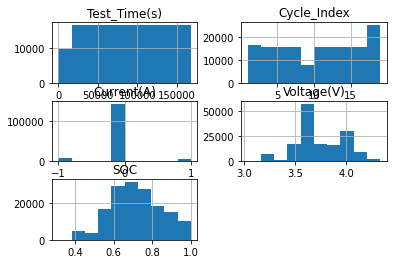

<Figure size 1440x1440 with 0 Axes>

In [13]:
combined_data.hist()
plt.figure(figsize=(20,20))
plt.show()

In [118]:
combined_data=combined_data.drop(columns=['Test_Time(s)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf2c580890>,
      dtype=object)

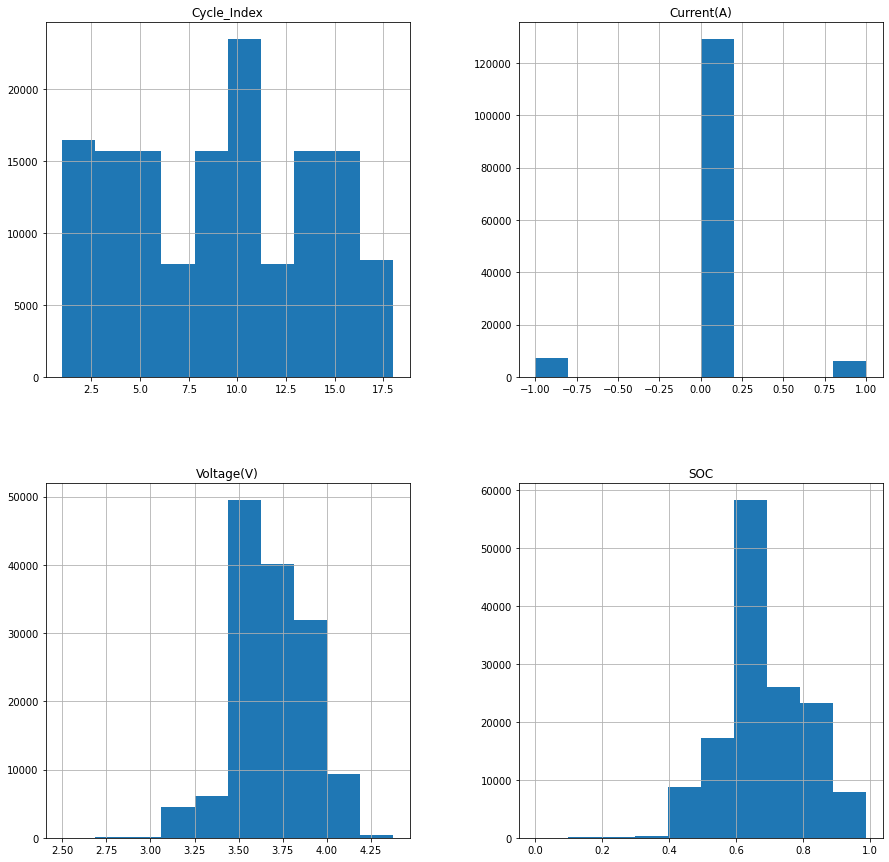

In [119]:
  fig = plt.figure(figsize = (15,15))
  ax = fig.gca()
  combined_data.hist(ax = ax)

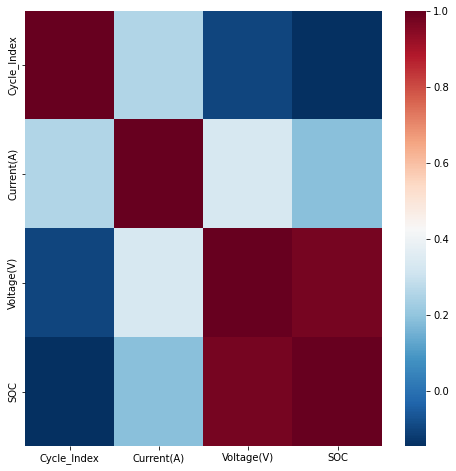

In [120]:
correlations = combined_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [121]:
combined_data.describe()

,Cycle_Index,Current(A),Voltage(V),SOC
count,142119.000000,142119.000000,142119.000000,142119.000000
mean,9.029032,-0.007765,3.684208,0.691114
std,4.802561,0.303031,0.207378,0.118811
min,1.000000,-1.000233,2.499903,0.000000
25%,5.000000,0.000000,3.577119,0.633504
50%,9.000000,0.000000,3.661715,0.672399
75%,13.000000,0.000000,3.839495,0.787366
max,18.000000,0.999904,4.375753,0.988512


Deleting 0 valued columns

In [122]:
#cd2=pd.read_csv('/content/drive/MyDrive/LSTM_SOC_Implementation/r1.csv')
cd2=combined_data
cd2.describe()

,Cycle_Index,Current(A),Voltage(V),SOC
count,142119.000000,142119.000000,142119.000000,142119.000000
mean,9.029032,-0.007765,3.684208,0.691114
std,4.802561,0.303031,0.207378,0.118811
min,1.000000,-1.000233,2.499903,0.000000
25%,5.000000,0.000000,3.577119,0.633504
50%,9.000000,0.000000,3.661715,0.672399
75%,13.000000,0.000000,3.839495,0.787366
max,18.000000,0.999904,4.375753,0.988512


In [123]:
cd2

,Cycle_Index,Current(A),Voltage(V),SOC
0,1.0,0.000000,4.166209,0.970000
1,1.0,0.000000,4.166047,0.980028
2,1.0,0.000000,4.166047,0.980028
3,1.0,0.000000,4.166209,0.980123
4,1.0,0.000000,4.166047,0.980028
...,...,...,...,...
142114,18.0,0.999544,4.249022,0.889110
142115,18.0,0.999364,4.249184,0.889249
142116,18.0,0.999544,4.249508,0.889390
142117,18.0,0.999544,4.249671,0.889528


In [124]:
y = cd2.SOC
X = cd2.drop(['SOC'], axis=1)

In [125]:
X.describe()

,Cycle_Index,Current(A),Voltage(V)
count,142119.000000,142119.000000,142119.000000
mean,9.029032,-0.007765,3.684208
std,4.802561,0.303031,0.207378
min,1.000000,-1.000233,2.499903
25%,5.000000,0.000000,3.577119
50%,9.000000,0.000000,3.661715
75%,13.000000,0.000000,3.839495
max,18.000000,0.999904,4.375753


split

In [126]:
cd2.values

array([[ 1.        ,  0.        ,  4.16620922,  0.97      ],
       [ 1.        ,  0.        ,  4.1660471 ,  0.9800277 ],
       [ 1.        ,  0.        ,  4.1660471 ,  0.9800277 ],
       ...,
       [18.        ,  0.99954402,  4.24950838,  0.88938957],
       [18.        ,  0.99954402,  4.24967051,  0.88952842],
       [18.        ,  0.99954402,  4.24983215,  0.88966944]])

In [127]:
from sklearn.preprocessing import MinMaxScaler


In [128]:
dataset = cd2.SOC.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [131]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [132]:
# reshape into X=t and Y=t+1
look_back = 3

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [133]:
X_train

array([[0.98127282, 0.99141706, 0.99141706],
       [0.99141706, 0.99141706, 0.99151354],
       [0.99141706, 0.99151354, 0.99141706],
       ...,
       [0.69930767, 0.69950048, 0.69930767],
       [0.69950048, 0.69930767, 0.6992112 ],
       [0.69930767, 0.6992112 , 0.69930767]])

In [134]:
X_train.shape

(113691, 3)

In [135]:
Y_train.shape

(113691,)

In [136]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [137]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


In [138]:
model = Sequential()
#model.add(LSTM(,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=50), ModelCheckpoint(filepath='best_model25.h5', monitor='val_loss', save_best_only=True)], verbose=1, shuffle=False)
#scores = model.evaluate(X_test, Y_test, verbose=1)
#print("Accuracy: %.2f%%" % (scores[1]*100))
# Training Phase
model.summary()

Epoch 1/100
1777/1777 [==============================] - 11s 5ms/step - loss: 0.0204 - val_loss: 8.4121e-04
Epoch 2/100
1777/1777 [==============================] - 6s 3ms/step - loss: 0.0014 - val_loss: 8.4912e-04
Epoch 3/100
1777/1777 [==============================] - 6s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/100
1777/1777 [==============================] - 6s 3ms/step - loss: 8.3088e-04 - val_loss: 0.0015
Epoch 5/100
1777/1777 [==============================] - 6s 3ms/step - loss: 7.3224e-04 - val_loss: 0.0020
Epoch 6/100
1777/1777 [==============================] - 6s 3ms/step - loss: 6.6803e-04 - val_loss: 0.0017
Epoch 7/100
1777/1777 [==============================] - 6s 3ms/step - loss: 5.5730e-04 - val_loss: 0.0013
Epoch 8/100
1777/1777 [==============================] - 6s 3ms/step - loss: 4.4728e-04 - val_loss: 9.3828e-04
Epoch 9/100
1777/1777 [==============================] - 6s 3ms/step - loss: 3.3614e-04 - val_loss: 5.9669e-04
Epoch 10/100
1777/1777 [========

In [ ]:
'''from keras.models import load_model
saved_model = load_model('best_model45.h5')
train_acc = saved_model.evaluate(X_train, Y_train, verbose=0)
test_acc = saved_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))'''

In [139]:
# make predictions
from keras.models import load_model
saved_model = load_model('best_model25.h5')
train_predict = saved_model.predict(X_train)
test_predict = saved_model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.016571470503078885
Train Root Mean Squared Error: 0.02121070705433436
Test Mean Absolute Error: 0.016067126891701707
Test Root Mean Squared Error: 0.019231908372575716


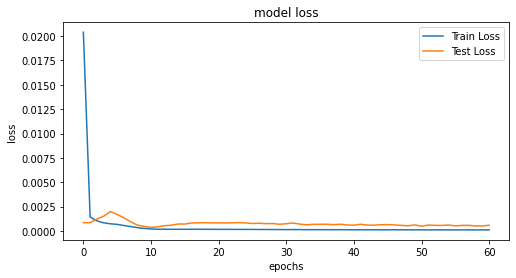

In [140]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

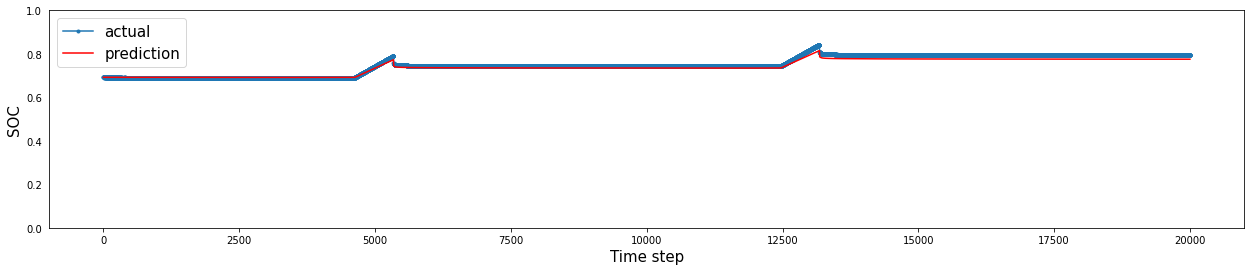

In [141]:
aa=[x for x in range(20000)]
plt.figure(figsize=(20,4))
plt.plot(aa, Y_test[0][:20000], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:20000], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.tight_layout()
#sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.ylim((0,1))
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

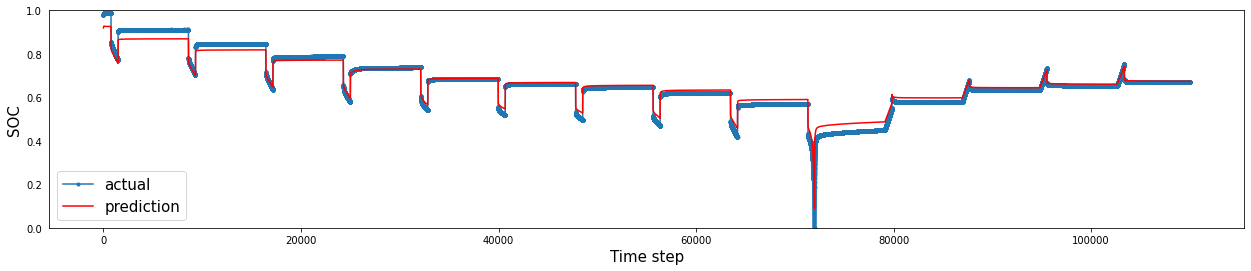

In [142]:
aa=[x for x in range(110000)]
plt.figure(figsize=(20,4))
plt.plot(aa, Y_train[0][:110000], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:110000], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.tight_layout()
#sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.ylim((0,1))
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();